In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from string import punctuation
import json

In [2]:
file_name = 'test_set_002.csv'

data = pd.read_csv(file_name, delimiter=',')

print(data.shape)
data.head(5)

(26861, 3)


,defs,word,len
0,колпак на лампе,абажур,15
1,настоятель католического монастыря,аббат,34
2,католический священник,аббат,22
3,католический монастырь,аббатство,22
4,слово из первых букв,аббревиатура,20


In [3]:
import spacy


nlp = spacy.load('ru2')
nlp.add_pipe(nlp.create_pipe('sentencizer'), first=True)

In [4]:
entries = ['POS', 'freq', 'example']

frequences = {}
examples = {}

for text in data['defs']:
    text = ''.join(x for x in text if x not in punctuation)
    doc = nlp(text)
    for word in doc:
        pos_tag = word.pos_
        if pos_tag not in frequences:
            examples[pos_tag] = word.lemma_
        frequences[pos_tag] = frequences[pos_tag] + 1 if pos_tag in frequences else 1

array = [[k, v, examples[k]] for k,v in frequences.items()]
        
df = pd.DataFrame(data = array, columns = entries)
df_sorted = df.sort_values('freq', ascending=False)

In [5]:
df_sorted

,POS,freq,example
0,NOUN,99465,колпак
2,ADJ,37989,католический
1,ADP,21904,на
3,VERB,15374,поступать
6,CCONJ,10513,и
5,PRON,5018,нечто
4,ADV,4330,где
8,DET,4230,тот
9,SPACE,3849,
7,NUM,1391,один


In [6]:
df_sorted = df_sorted.loc[df_sorted['POS'] != 'SPACE']

In [7]:
df_sorted

,POS,freq,example
0,NOUN,99465,колпак
2,ADJ,37989,католический
1,ADP,21904,на
3,VERB,15374,поступать
6,CCONJ,10513,и
5,PRON,5018,нечто
4,ADV,4330,где
8,DET,4230,тот
7,NUM,1391,один
13,PART,1140,лишь


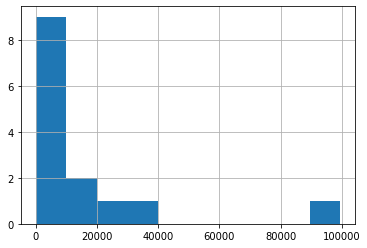

In [8]:
h = df_sorted['freq'].hist()
fig = h.get_figure()

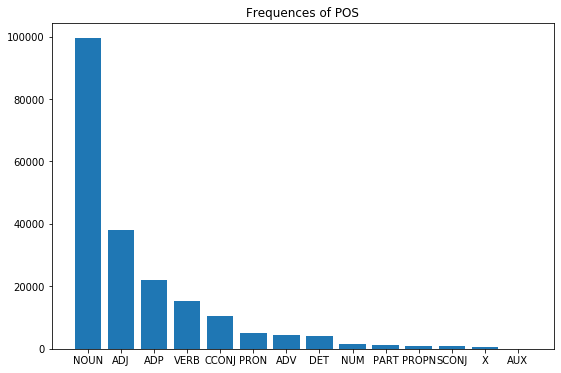

In [9]:
x = df_sorted['POS']
y = df_sorted['freq']

fig, ax = plt.subplots()

plt.title('Frequences of POS')

ax.bar(x, y)

fig.set_figwidth(9)
fig.set_figheight(6)

plt.show()